In [1]:
import numpy as np
import pandas as pd
import os
import requests
import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

In [2]:
# Set up folder with data:
os.chdir('D:\\01_PROJECTS_sripts_code\\Electricty_Demand\\02_FORECAST')

In [3]:
#%% Function to extract code from GitHub:
def GetGitHubCode(GitUrl):

    response = requests.get(GitUrl) #get data from json file located at specified URL 

    if response.status_code == requests.codes.ok:
        contentOfUrl = response.content
        exec(contentOfUrl, globals() )
    else:
        print('Content was not found.')

In [12]:
# Download functions from GitHub:
GitUrl__Prepare_Data_For_Regression = 'https://raw.githubusercontent.com/kamilbanas85/Phyton_usefull_functions/main/Prepare_Data_For_Regression.py'
GetGitHubCode(GitUrl__Prepare_Data_For_Regression)

GitUrl__Make_TS_Regression = 'https://raw.githubusercontent.com/kamilbanas85/Phyton_usefull_functions/main/Make_TS_Regression.py'
GetGitHubCode(GitUrl__Make_TS_Regression)

GitUrl__Goodness_Of_Fit = 'https://raw.githubusercontent.com/kamilbanas85/Phyton_usefull_functions/main/Goodness_Of_Fit.py'
GetGitHubCode(GitUrl__Goodness_Of_Fit)

GitUrl__Multicollinearity_Check_Functions= 'https://raw.githubusercontent.com/kamilbanas85/Phyton_usefull_functions/main/Multicollinearity_Check_Functions.py'
GetGitHubCode(GitUrl__Multicollinearity_Check_Functions)

In [4]:
# Read Analysis Data:
AnalysisData = pd.read_csv('AnalysisDF.csv',
                           parse_dates =['Date'],
                           index_col = 'Date')

AnalysisData.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 63552 entries, 2015-07-01 01:00:00 to 2022-09-30 00:00:00
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Demand               63552 non-null  float64
 1   air_temperature      63552 non-null  float64
 2   humidity             63552 non-null  float64
 3   sky_cover            63552 non-null  float64
 4   wind_speed           63552 non-null  float64
 5   Population           63552 non-null  float64
 6   RealGDP              63552 non-null  float64
 7   DallasFedManufIndex  63552 non-null  float64
 8   WorkDay              63552 non-null  int64  
 9   hour                 63552 non-null  int64  
 10  day                  63552 non-null  int64  
 11  week                 63552 non-null  int64  
 12  month                63552 non-null  int64  
 13  HDD                  63552 non-null  int64  
 14  CDD                  63552 non-null  int64  
dtypes

In [5]:
##########################################################
##########################################################
#%% Prepare data
##########################################################
##########################################################

In [6]:
# Select Main Data
Dependent_Var = 'Demand'

Independent_Vars = ['HDD',
                    'CDD',
                    'wind_speed',
                    'humidity',
                    'sky_cover',
#                   'Population',
                    'RealGDP',
                    'DallasFedManufIndex',
                    'WorkDay',
                    'hour',
#                   'day',
                    'week'
#                   'month'
                   ]

DummyForColumn = ['hour','week']
LagList = None

In [7]:
### Cut data to pre-Covid time and crate 2 datasets to show diffrence between a summer and winter predictions

In [8]:
###################
#%% '01' model on summer time
###################

In [9]:
AnalysisData_01 = AnalysisData.loc[:'2019-07']

In [10]:
TestSetDate_01 = '2019-02'

In [13]:
# Prepare Data For Linear Regression
X_01, y_01 =  DevideOnXandY_CreateDummies(AnalysisData_01, 
                                          DependentVar = Dependent_Var,
                                          IndependentVar = Independent_Vars,
                                          DummyForCol = DummyForColumn,
                                          drop_first = True)

X_Train_01, y_Train_01,\
X_Test_01, y_Test_01 =\
            PrepareDataForRegression(X_01, y_01, 
                                     TestSplitInd = TestSetDate_01,
                                     ValSplitInd = None,     
                                     ScalerType = None,
                                     ScalerRange = None,                             
                                     BatchSize = None,
                                     WindowLength = 1)

In [14]:
###################
#%% '02' model on winter time
###################

In [15]:
AnalysisData_02 = AnalysisData.loc[:'2020-02']

In [16]:
TestSetDate_02 = '2019-09'

In [17]:
# Prepare Data For Linear Regression
X_02, y_02 =  DevideOnXandY_CreateDummies(AnalysisData_02, 
                                          DependentVar = Dependent_Var,
                                          IndependentVar = Independent_Vars,
                                          DummyForCol = DummyForColumn,
                                          drop_first = True)

X_Train_02, y_Train_02,\
X_Test_02, y_Test_02 =\
        PrepareDataForRegression(X_02, y_02, 
                                 TestSplitInd = TestSetDate_02,
                                 ValSplitInd = None,     
                                 ScalerType = None,
                                 ScalerRange = None,                             
                                 BatchSize = None,
                                 WindowLength = 1)

In [18]:
##########################################################
##########################################################
#%% FIT MODEL - Train Set
##########################################################
##########################################################

In [19]:
###################
#%% '01' model on summer time
###################

In [20]:
AddIntercept = True
ModelLR_01 = sm.OLS( y_Train_01, sm.add_constant(X_Train_01) )

ModelLRFitted_01 = ModelLR_01.fit()

# Check model
ModelLRFitted_01.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Demand   R-squared:                       0.896
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     3257.
Date:                Thu, 23 Mar 2023   Prob (F-statistic):               0.00
Time:                        00:20:44   Log-Likelihood:            -2.9739e+05
No. Observations:               31463   AIC:                         5.949e+05
Df Residuals:                   31379   BIC:                         5.956e+05
Df Model:                          83                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                7317.1025    888.582      8.235      0.000    5575.447    9058.758
HDD                   625.9868      5.792    108.070      0.000     614.633     637.340
CDD                  1170.6962      7.404    158.126      0.000    1156.185    1185.207
wind_speed             65.0288      3.211     20.251      0.000      58.735      71.323
humidity               17.0931      1.394     12.259      0.000      14.360      19.826
sky_cover               5.0410      0.582      8.668      0.000       3.901       6.181
RealGDP                 0.0139      0.001     26.530      0.000       0.013       0.015
DallasFedManufIndex    25.1052      1.301     19.294      0.000      22.555      27.656
WorkDay              2021.1894     37.747     53.546      0.000    1947.204    2095.175
hour__1             -2263.9447    120.554    -18.780      0.000   -2500.235   -2027.654
hour__2             -3756.8279    120.599    -31.151      0.000   -3993.207   -3520.449
hour__3             -4624.2840    120.709    -38.310      0.000   -4860.877   -4387.691
hour__4             -5014.9414    121.269    -41.354      0.000   -5252.633   -4777.249
hour__5             -4835.1828    121.303    -39.860      0.000   -5072.942   -4597.424
hour__6             -3500.5016    121.373    -28.841      0.000   -3738.397   -3262.606
hour__7             -1468.3483    121.175    -12.118      0.000   -1705.855   -1230.841
hour__8              -858.9015    120.886     -7.105      0.000   -1095.843    -621.960
hour__9              -689.1806    122.962     -5.605      0.000    -930.190    -448.171
hour__10              300.9983    123.985      2.428      0.015      57.982     544.014
hour__11             1248.1259    125.800      9.922      0.000    1001.553    1494.699
hour__12             2079.6738    126.754     16.407      0.000    1831.232    2328.116
hour__13             2765.0963    127.578     21.674      0.000    2515.039    3015.154
hour__14             3511.5333    128.471     27.333      0.000    3259.725    3763.341
hour__15             3874.2004    130.171     29.762      0.000    3619.060    4129.341
hour__16             4897.9324    128.277     38.182      0.000    4646.504    5149.361
hour__17             5582.9878    127.487     43.792      0.000    5333.107    5832.868
hour__18             6356.8195    126.158     50.388      0.000    6109.545    6604.094
hour__19             6861.8500    124.866     54.954      0.000    6617.108    7106.592
hour__20             6650.5641    123.412     53.889      0.000    6408.672    6892.456
hour__21             6596.5027    120.860     54.580      0.000    6359.612    6833.394
hour__22             5221.0447    120.686     43.262      0.000    4984.496    5457.593
hour__23             2721.1998    120.562     22.571      0.000    2484.894    2957.505
wee

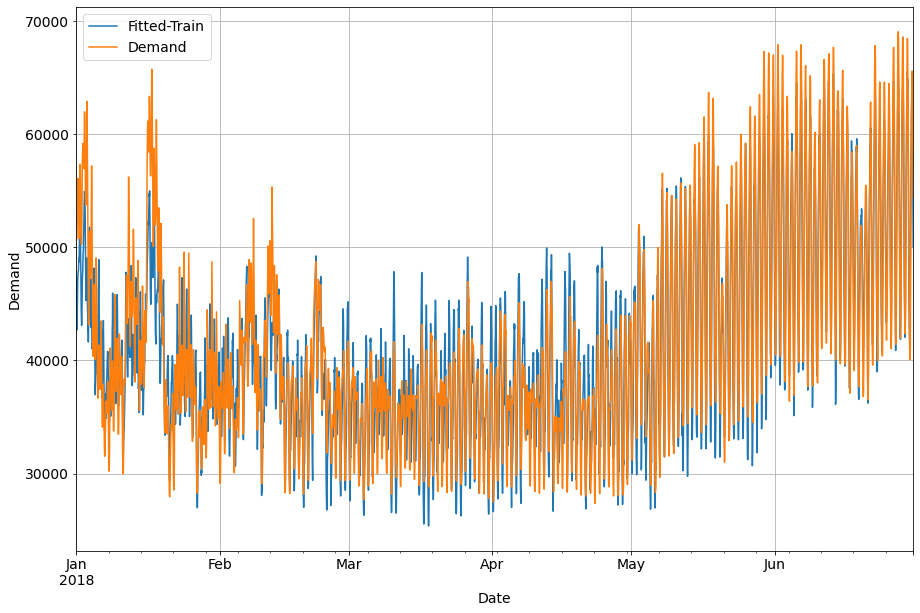

In [22]:
# Plot fitted model
ModelLRFitted_01.fittedvalues.rename('Fitted-Train').to_frame()\
    .join(y_Train_01)\
    .loc['2018-01':'2018-06']\
    .plot()

plt.ylabel('Demand', fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=14)
plt.grid()
plt.rcParams['figure.figsize'] = [15, 10]
plt.show()

In [21]:
###################
#%% '02' model on winter time
###################

In [23]:
AddIntercept = True
ModelLR_02 = sm.OLS( y_Train_02, sm.add_constant(X_Train_02) )

ModelLRFitted_02 = ModelLR_02.fit()

In [24]:
##########################################################
##########################################################
#%% Check Model - Test Set
##########################################################
##########################################################

In [25]:
###################
#%% test '01' model on summer time
###################

In [26]:
# Make prediction on test set
yhat_Test_LR_01, X_Test_withLags = \
   MakeTSforecast(X_Test_01, ModelLRFitted_01,\
                  DependentVar = Dependent_Var,
                  Intecept = AddIntercept,
                  LagsList = LagList,
                  Scaler_y = None, Scaler_X = None,
                  Test_or_Forecast = 'Test')

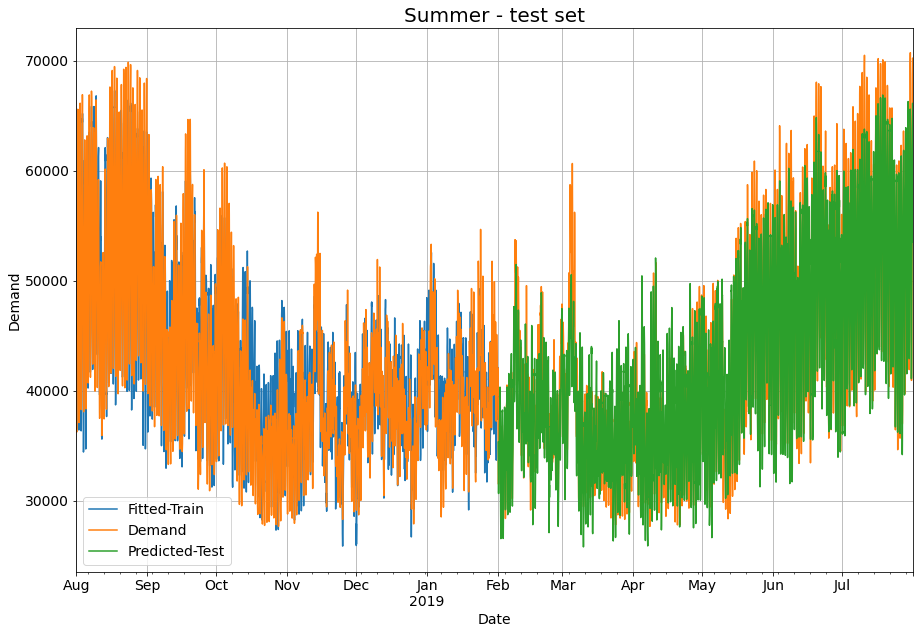

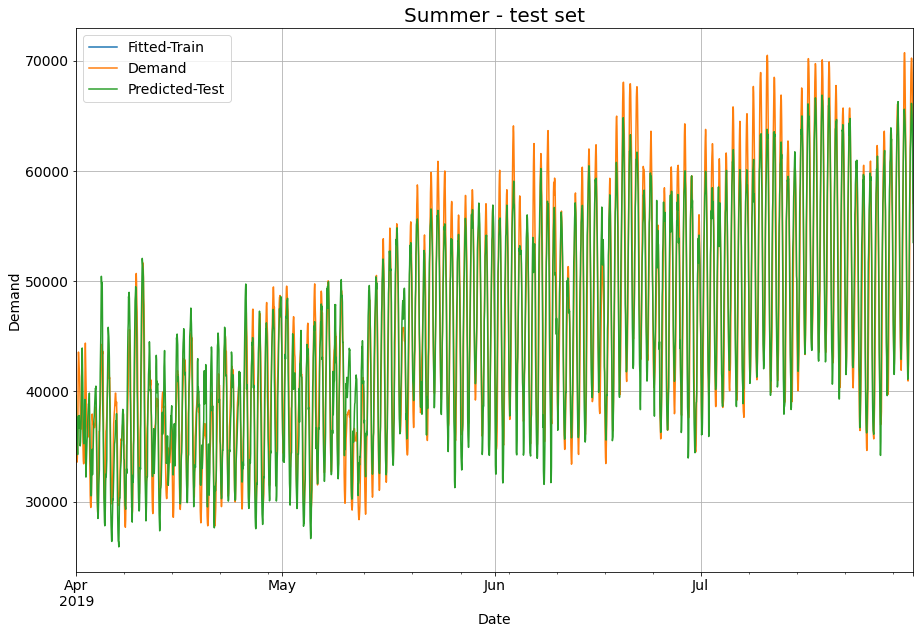

In [27]:
# Plot Fitted Data
ModelLRFitted_01.fittedvalues.rename('Fitted-Train').to_frame()\
        .join(y_Train_01)\
        .append( yhat_Test_LR_01.join(y_Test_01) )\
        .loc['2018-08':]\
        .plot()
        
plt.ylabel('Demand', fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('Summer - test set', fontsize=20)
plt.legend(fontsize=14)
plt.grid()
plt.rcParams['figure.figsize'] = [15, 10]
plt.show()



ModelLRFitted_01.fittedvalues.rename('Fitted-Train').to_frame()\
        .join(y_Train_01)\
        .append( yhat_Test_LR_01.join(y_Test_01) )\
        .loc['2019-04':]\
        .plot()

plt.ylabel('Demand', fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('Summer - test set', fontsize=20)
plt.legend(fontsize=14)
plt.grid()
plt.rcParams['figure.figsize'] = [15, 10]
plt.show()

In [28]:
print( CalculateR2andR2adj(y_Test_01, yhat_Test_LR_01, X_Test_01, const = AddIntercept) )
print('')
print( f'MAE:  {round(mean_absolute_error(y_Test_01, yhat_Test_LR_01),2)}'  )
print( f'MAPE: {round(mean_absolute_percentage_error(y_Test_01, yhat_Test_LR_01)*100,2)}' )
print( f'RSME: {round(np.sqrt(mean_squared_error(y_Test_01, yhat_Test_LR_01)),2)}' )

R2: 0.888
R2_adj: 0.8858
(0.888, 0.8858)

MAE:  2497.61
MAPE: 5.9
RSME: 3153.17


In [29]:
###################
#%% test '02' model on  winter time
###################

In [30]:
# Make prediction on test set
yhat_Test_LR_02, X_Test_withLags = \
   MakeTSforecast(X_Test_02, ModelLRFitted_02,\
                  DependentVar = Dependent_Var,
                  Intecept = AddIntercept,
                  LagsList = LagList,
                  Scaler_y = None, Scaler_X = None,
                  Test_or_Forecast = 'Test')

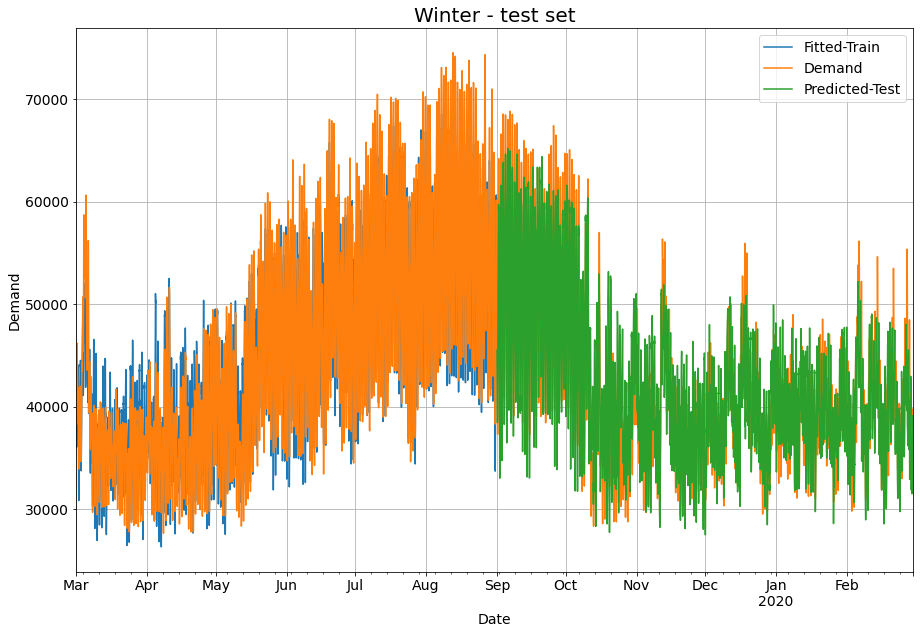

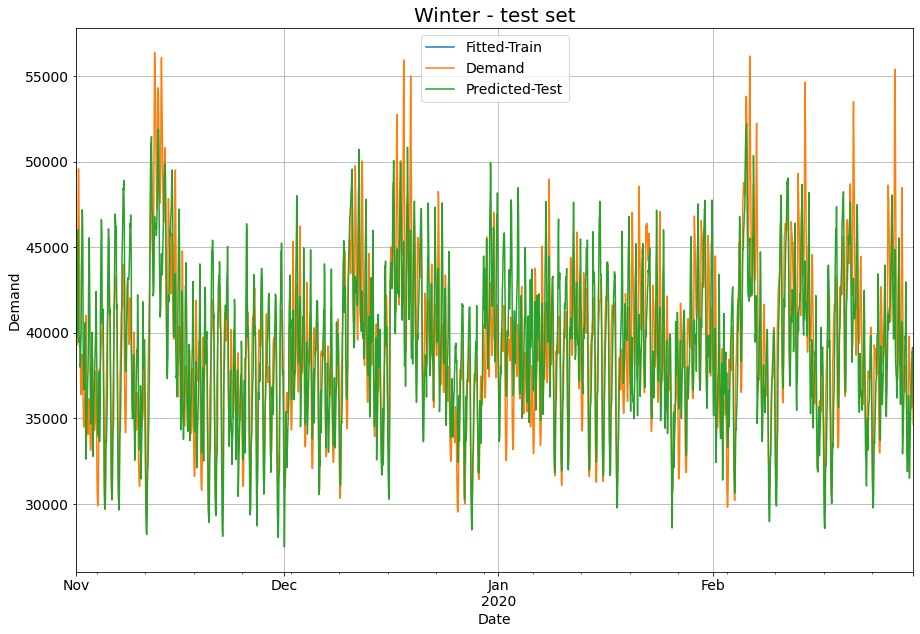

In [31]:
# Plot Fitted Data
ModelLRFitted_02.fittedvalues.rename('Fitted-Train').to_frame()\
        .join(y_Train_02)\
        .append( yhat_Test_LR_02.join(y_Test_02) )\
        .loc['2019-03':]\
        .plot()

plt.ylabel('Demand', fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('Winter - test set', fontsize=20)
plt.legend(fontsize=14)
plt.grid()
plt.rcParams['figure.figsize'] = [15, 10]
plt.show()


ModelLRFitted_02.fittedvalues.rename('Fitted-Train').to_frame()\
        .join(y_Train_02)\
        .append( yhat_Test_LR_02.join(y_Test_02) )\
        .loc['2019-11':]\
        .plot()

plt.ylabel('Demand', fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('Winter - test set', fontsize=20)
plt.legend(fontsize=14)
plt.grid()
plt.rcParams['figure.figsize'] = [15, 10]
plt.show()

In [32]:
print( CalculateR2andR2adj(y_Test_02, yhat_Test_LR_02, X_Test_02, const = AddIntercept) )
print('')
print( f'MAE:  {round(mean_absolute_error(y_Test_02, yhat_Test_LR_02),2)}'  )
print( f'MAPE: {round(mean_absolute_percentage_error(y_Test_02, yhat_Test_LR_02)*100,2)}' )
print( f'RSME: {round(np.sqrt(mean_squared_error(y_Test_02, yhat_Test_LR_02)),2)}' )

R2: 0.8136
R2_adj: 0.81
(0.8136, 0.81)

MAE:  2670.2
MAPE: 6.49
RSME: 3368.83


In [33]:
##########################################################
##########################################################
#%% Check Residuals and OLS assumption
##########################################################
##########################################################

In [34]:
###################
#%% Check AutoCorrelation of residuals
###################

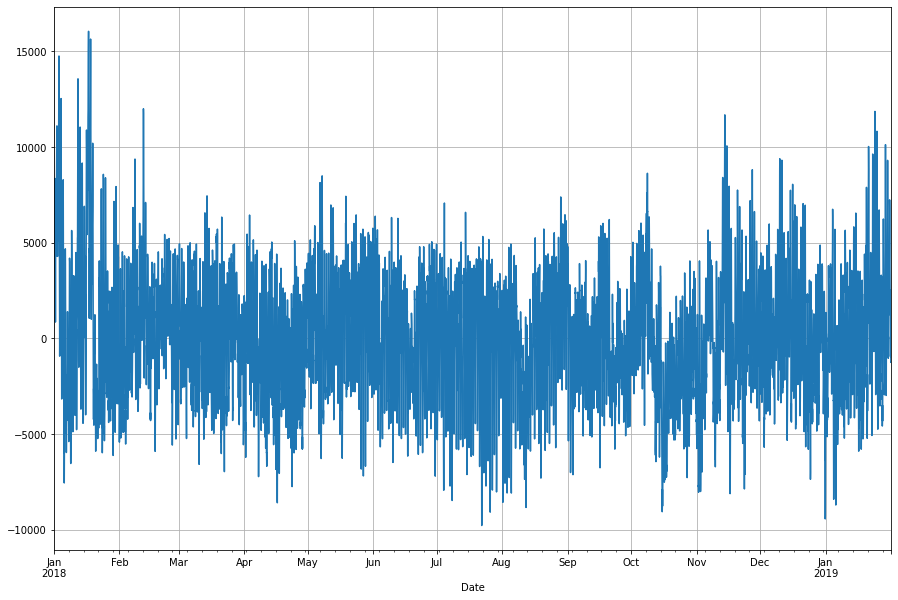

In [35]:
# Plot Resudulas
ModelLRFitted_01.resid.loc['2018':].plot()
plt.grid()
plt.rcParams['figure.figsize'] = [15, 10]
plt.show()

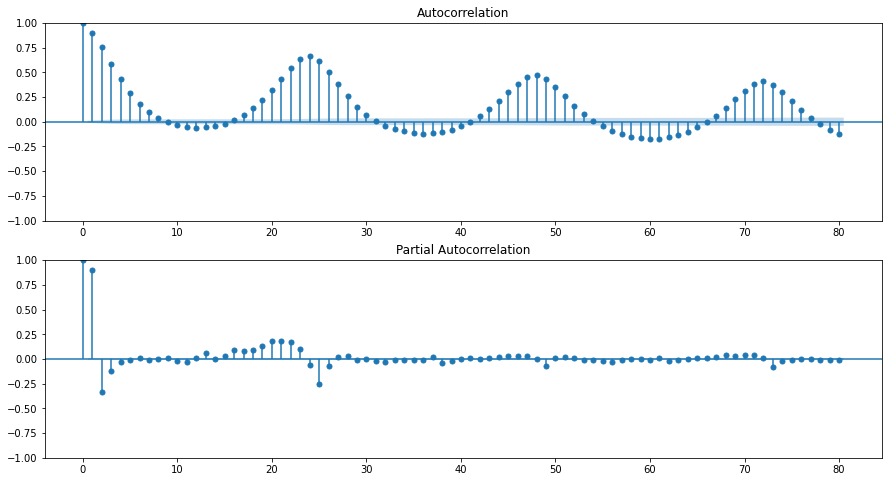

In [36]:
# plot autocorelogram
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, ax = plt.subplots(2,1, figsize=(15,8))
fig = plot_acf(ModelLRFitted_01.resid, lags=80, ax=ax[0])
fig = plot_pacf(ModelLRFitted_01.resid, lags=80, ax=ax[1], method='ywm')
plt.show()

In [37]:
# Durbin-Whatson Test - 1-order autocorrelation
# A value:
#   - 2.0:               no autocorrelation
#   - 0 to less than 2:  positive autocorrelation
#   - from 2 to 4:       negative autocorrelation

In [38]:
from statsmodels.stats.stattools import durbin_watson

durbin_watson(ModelLRFitted_01.resid).round(3)

0.195

In [39]:
# To check higher order autocorrelation: Ljung-box test 
from statsmodels.stats.diagnostic import acorr_ljungbox
acorr_ljungbox(ModelLRFitted_01.resid)
# H0 - a residuals are independently distributed
# p-values less than 0.05 -> H0 is receted for a lot of lags
# so a higer oreder autocorrelations exists

,lb_stat,lb_pvalue
1,25642.984279,0.0
2,43521.910112,0.0
3,54377.739876,0.0
4,60166.013547,0.0
5,62823.753304,0.0
6,63845.190996,0.0
7,64129.944584,0.0
8,64165.980988,0.0
9,64166.901560,0.0
10,64197.157709,0.0


In [40]:
# Based on ACF, PACF plots and on the statistics we can conlude that residuals are autocorrelated.
# Morover, osicilation of ACF plot indicates seasonality with period 24 which wasn't captured 

In [41]:
###################
#%% Check Heteroskedasticity of residuals
###################

In [42]:
# Breusch-Pagan Lagrange Multiplier test
from statsmodels.compat import lzip
from statsmodels.stats.diagnostic import het_breuschpagan

test = het_breuschpagan(ModelLRFitted_01.resid, ModelLRFitted_01.model.exog)
names = ['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value']
lzip(names, test)

# H0: Homoscedasticity is present
# the null hypothesis is rejected if p<0.05, so in this case we reject H0, so Hetercedasity is present

[('Lagrange multiplier statistic', 6083.6856943795965),
 ('p-value', 0.0),
 ('f-value', 90.62497323090248),
 ('f p-value', 0.0)]

In [43]:
# Goldfeld-Quandt test
from statsmodels.stats.diagnostic import het_goldfeldquandt

name = ['F statistic', 'p-value']
test = het_goldfeldquandt(ModelLRFitted_01.resid, ModelLRFitted_01.model.exog)
lzip(name, test)
# H0 for the GQ test is homoskedasticity, in our case id rejected

[('F statistic', 1.130083078365708), ('p-value', 1.0340045018724746e-14)]

In [44]:
# 2 tests show that Hetercedasity is pronlem of resiaduals 

In [45]:
###################
#%% Check Correalation Between Regressors and Residuals
###################

In [46]:
## The null hypothesis is that the two variables are uncorrelated
## so p-value greater than 0.05 support uncorrelation
from scipy.stats import pearsonr

resultsLIST = []
for columnName in X_Train_01.columns:

    CorrRegressVsResidDF_temp =\
        pd.DataFrame([pearsonr( ModelLRFitted_01.resid, X_Train_01.loc[:,columnName] )[1].round(4)],\
                     columns = ["p-value"] )
    CorrRegressVsResidDF_temp.index = [columnName]
    resultsLIST.append(CorrRegressVsResidDF_temp)  

results = pd.concat(resultsLIST)

print(results)

            p-value
HDD             1.0
CDD             1.0
wind_speed      1.0
humidity        1.0
sky_cover       1.0
...             ...
week__49        1.0
week__50        1.0
week__51        1.0
week__52        1.0
week__53        1.0

[83 rows x 1 columns]


In [47]:
print( results['p-value'].unique() )

[1.]


In [48]:
# there is no problem with correalation between regressors and residuals 

In [49]:
###################
#%% Check Normality of residuals
###################

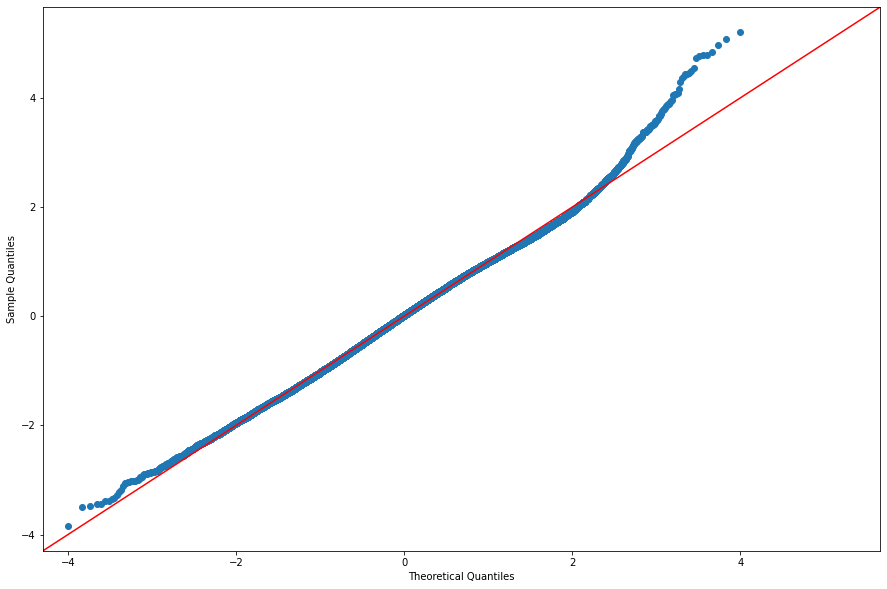

In [50]:
# QQ-Plot of residuals
fig1 = sm.qqplot(ModelLRFitted_01.resid, fit=True, line='45')
plt.rcParams['figure.figsize'] = [12, 8]
plt.show()

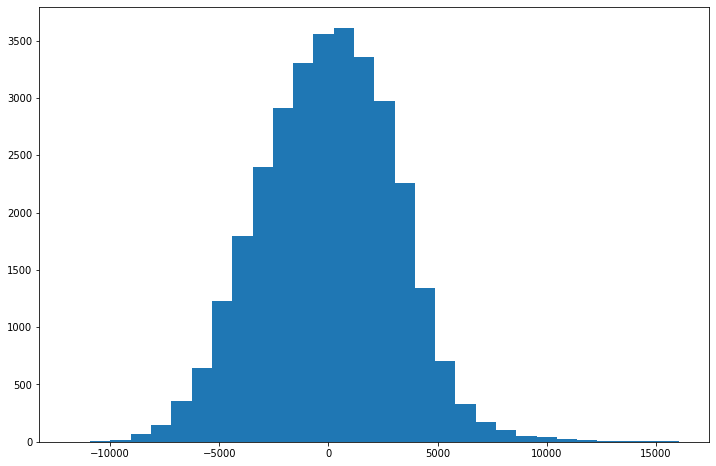

In [51]:
#create a histogram to visualize the distribution
plt.hist(ModelLRFitted_01.resid, 30)
plt.rcParams['figure.figsize'] = [12, 8]
plt.show()

In [52]:
# The is some distortion, however not very big